# Bouncing ball (Jupyter version)

You can use `vip-ivp` in Jupyter Notebook, but don't forget to call `vip.new_system()` at the beginning of the notebook. 
Otherwise, solving time will get longer and longer.

## Initialisation

In [1]:
import vip_ivp as vip

vip.new_system()

# Parameters
initial_height = 1  # m
GRAVITY = -9.81
k = 0.7  # Bouncing coefficient
v_min = 0.01  # Minimum velocity need to bounce

## Creating the system

In [2]:
acceleration = vip.temporal(GRAVITY)
velocity = vip.integrate(acceleration, x0=0)
height = vip.integrate(velocity, x0=initial_height)

## Defining the bouncing event

In [3]:
hit_ground = height.cross_trigger(0, "falling")
velocity.reset_on(hit_ground, -0.8 * velocity)
vip.terminate_on(hit_ground & (abs(velocity) <= v_min))

Event(On hit_ground and (abs(velocity) <= 0.01), Terminate simulation)

## Solving

Solving time = 0.7121264934539795 s
Number of triggered events = 29



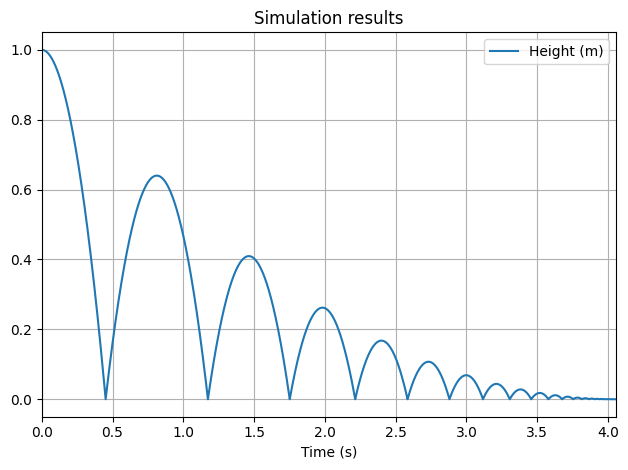

In [4]:
# Add variables to plot
height.to_plot("Height (m)")

# Solve the system
vip.solve(20, time_step=0.001, verbose=True)